#importing Libraries 


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset


In [5]:
dataset= pd.read_csv('kc_house_data.xls')
y=dataset['price'].values
X=dataset.drop(['price','date','id'],axis=1).values

#Encode the data

In [6]:
from sklearn.preprocessing import LabelEncoder
label_X=LabelEncoder()
X[:,1]=label_X.fit_transform(X[:,1])

# Feature Scaling


In [7]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X=sc.transform(X)
dataset['price']=np.log(dataset['price'])

# Splitting the dataset into the Training set and Test set


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 44)

#fitting simple linear regression the training set


In [9]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(X_train,y_train)

# Predicting the Test set results
y_pred = le.predict(X_test)

#calculate the details Linear Regression
print('train_score le',le.score(X_train,y_train))
print('test_score le',le.score(X_test,y_test))

train_score le 0.7691850345371272
test_score le 0.7747168919700882


#Applying RandomForestRegression Model 


In [10]:
from sklearn.ensemble import RandomForestRegressor

rfr= RandomForestRegressor()
rfr.fit(X_train,y_train)

# Predicting the Test set results RandomForestRegression Model
y_pred = rfr.predict(X_test)

#calculate the details RandomForestRegression Model
print('train_score rfr', rfr.score(X_train,y_train))
print('test_score rfr',rfr.score(X_test,y_test))

train_score rfr 0.9819976816312814
test_score rfr 0.8895464035702512


#visualization

<Figure size 576x360 with 0 Axes>

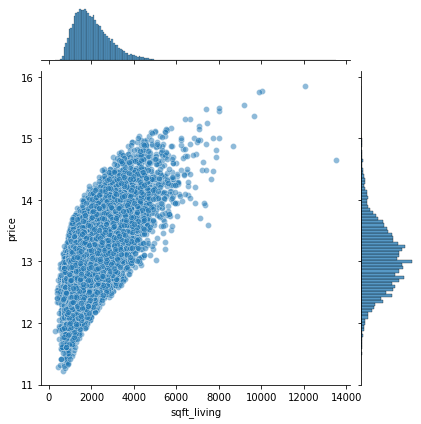

In [14]:
plt.figure(figsize = (8, 5))
sns.jointplot(x = dataset.sqft_living, y=dataset.price,alpha = 0.5)
plt.xlabel('Sqft Living',)
plt.ylabel('Sale Price',)
plt.show()

#histogram and normal probability plot


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


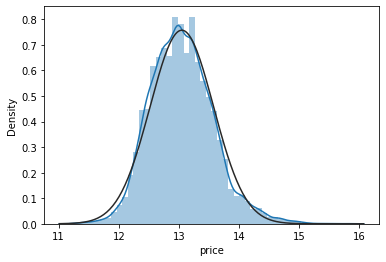

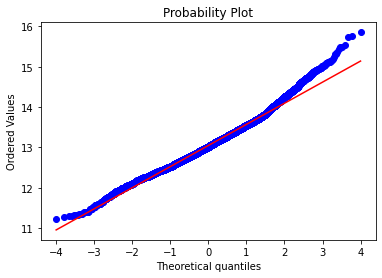

In [15]:
from scipy.stats import norm
from scipy import stats
sns.distplot(dataset['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(dataset['price'], plot=plt)